# IMPORTING LIBRARIES AND DATASET

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
clustering=pd.read_csv("Live.csv")
clustering.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [3]:
clustering.shape

(7050, 16)

In [4]:
clustering.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
status_id           7050 non-null object
status_type         7050 non-null object
status_published    7050 non-null object
num_reactions       7050 non-null int64
num_comments        7050 non-null int64
num_shares          7050 non-null int64
num_likes           7050 non-null int64
num_loves           7050 non-null int64
num_wows            7050 non-null int64
num_hahas           7050 non-null int64
num_sads            7050 non-null int64
num_angrys          7050 non-null int64
Column1             0 non-null float64
Column2             0 non-null float64
Column3             0 non-null float64
Column4             0 non-null float64
dtypes: float64(4), int64(9), object(3)
memory usage: 881.4+ KB


In [5]:
clustering.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

In [6]:
clustering.drop(columns=['Column1', 'Column2', 'Column3', 'Column4'], inplace=True)

In [7]:
clustering.isnull().sum()

status_id           0
status_type         0
status_published    0
num_reactions       0
num_comments        0
num_shares          0
num_likes           0
num_loves           0
num_wows            0
num_hahas           0
num_sads            0
num_angrys          0
dtype: int64

In [8]:
clustering.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000


In [9]:
len(clustering['status_published'].unique())

6913

In [10]:
len(clustering['status_id'].unique())

6997

In [11]:
clustering['status_type'].value_counts()

photo     4288
video     2334
status     365
link        63
Name: status_type, dtype: int64

In [12]:
len(clustering['status_type'].unique())

4

In [13]:
clustering.drop(columns=['status_published','status_id'],inplace=True)

In [14]:
clustering.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 10 columns):
status_type      7050 non-null object
num_reactions    7050 non-null int64
num_comments     7050 non-null int64
num_shares       7050 non-null int64
num_likes        7050 non-null int64
num_loves        7050 non-null int64
num_wows         7050 non-null int64
num_hahas        7050 non-null int64
num_sads         7050 non-null int64
num_angrys       7050 non-null int64
dtypes: int64(9), object(1)
memory usage: 550.9+ KB


In [15]:
clustering.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0


In [16]:
clustering['status_type'].value_counts()

photo     4288
video     2334
status     365
link        63
Name: status_type, dtype: int64

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
clustering['status_type']=le.fit_transform(clustering['status_type'])

In [18]:
clustering.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0
3,1,111,0,0,111,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0


In [19]:
clustering['status_type'].value_counts()

1    4288
3    2334
2     365
0      63
Name: status_type, dtype: int64

In [20]:
y=clustering['status_type']
X=clustering.drop(columns='status_type')

In [21]:
cols = X.columns

In [22]:
#from sklearn.preprocessing import MinMaxScaler
#ms = MinMaxScaler()
#X = ms.fit_transform(x)

In [23]:
#X = pd.DataFrame(X, columns=[cols])
#X.head()

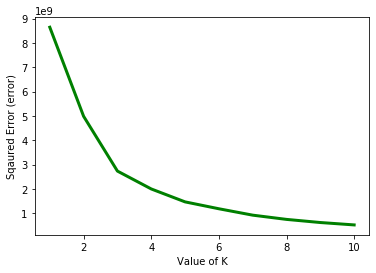

In [24]:
from sklearn.cluster import KMeans

# The Elbow Method
error =[] 
for i in range(1, 11): 
    KM = KMeans(n_clusters = i, max_iter = 500) 
    KM.fit(X)  
    error.append(KM.inertia_)      
  
plt.plot(range(1, 11), error, color ='g', linewidth ='3') 
plt.xlabel("Value of K") 
plt.ylabel("Sqaured Error (error)") 
plt.show()

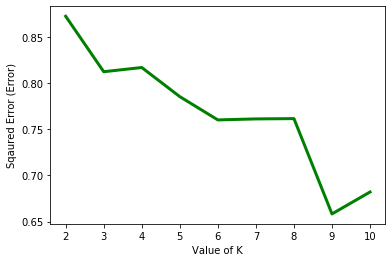

In [25]:
# The Silhouette Method
from sklearn.metrics import silhouette_score

Error = []

for k in range(2,11):
  kmeans = KMeans(n_clusters = k).fit(X)
  labels = kmeans.labels_
  Error.append(silhouette_score(X, labels, metric = 'euclidean'))

plt.plot(range(2,11), Error, color ='g', linewidth ='3') 
plt.xlabel("Value of K") 
plt.ylabel("Sqaured Error (Error)") 
plt.show()

In [67]:
kmeans = KMeans(n_clusters=3, random_state=0) 
kmeans.fit(X)
y_predict = kmeans.predict(X)

from sklearn.metrics import accuracy_score
print(accuracy_score(y,y_predict)*100)

57.82978723404255


In [74]:
kmeans = KMeans(n_clusters=4, random_state=0) 
kmeans.fit(X)
y_predict = kmeans.predict(X)

from sklearn.metrics import accuracy_score
print(accuracy_score(y,y_predict)*100)

7.460992907801418
